In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)

In [4]:
#Reading data from the web

set.seed(19)

pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename("mean_ip" = X1, 
                       "std_dev_ip" = X2, 
                       "excess_kurtosis_ip" = X3, 
                       "skewness_ip" = X4, 
                       "mean_dm" = X5,
                       "std_dev_dm" = X6,
                       "excess_kurtosis_dm" = X7,
                       "skewness_dm" = X8,
                       "class" = X9) %>%
                mutate(class = as_factor(class)) %>%
                sample_n(size = 500)

pulsar_data   

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



mean_ip,std_dev_ip,excess_kurtosis_ip,skewness_ip,mean_dm,std_dev_dm,excess_kurtosis_dm,skewness_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
107.91406,37.32941,0.30272446,1.58089787,3.9272575,24.924345,6.711611,46.2225904,0
14.70312,29.81594,7.21863076,52.86635443,81.6028428,57.256627,1.058996,1.2584176,1
99.52344,54.36896,0.63675112,-0.22504476,2.2784281,15.332172,10.197710,127.5418937,0
106.06250,51.40354,0.31323378,-0.33572020,4.6889632,26.324866,6.360699,42.3073497,0
128.97656,55.67406,-0.08570242,-0.59446104,5.8586957,30.994971,5.618643,32.0538478,0
128.62500,43.70212,0.15793456,0.46496956,49.1906355,78.242754,1.043050,-0.7616284,0
95.39844,48.16286,0.51860972,0.49351065,2.2784281,18.554590,10.275586,114.6954798,0
123.57031,50.13352,0.13839104,-0.19433412,4.2433110,20.507895,6.616925,52.5052344,0
113.39844,51.77843,0.26218746,0.20984763,1.8545151,18.093558,10.431586,113.0406108,0


**Preliminary data analysis**

In [13]:
#Finding the maximum value for each variable
max_data <- pulsar_data %>%
            select(-class) %>%
            map_dfr(max) %>%
            pivot_longer(cols = mean_ip:skewness_dm, names_to = "value", values_to = "max")

#Finding the minimum value for each variable
min_data <- pulsar_data %>%
            select(-class) %>%
            map_dfr(min) %>%
            pivot_longer(cols = mean_ip:skewness_dm, names_to = "value", values_to = "min")

#Finding the mean value for each variable
mean_data <- pulsar_data %>%
             select(-class) %>%
             map_dfr(mean) %>%
             pivot_longer(cols = mean_ip:skewness_dm, names_to = "value", values_to = "mean")

#Combining min, max and mean data in a single dataframe
min_max_mean_data <- bind_cols(min_data, max_data, mean_data) %>%
                rename(value = value...1) %>%
                select(value, max, min, mean)

min_max_mean_data

#Counting the number of pulsar and non-pulsar datapoints in pulsar_data
pulsar_count <- pulsar_data %>%
                group_by(class) %>%
                summarize(n = n()) %>%
                select(class, n)
pulsar_count

New names:
* value -> value...1
* value -> value...3
* value -> value...5



value,max,min,mean
<chr>,<dbl>,<dbl>,<dbl>
mean_ip,177.828125,6.5000000,110.2503750
std_dev_ip,68.448329,28.4912267,46.3871655
excess_kurtosis_ip,7.218631,-1.4398314,0.5124081
skewness_ip,52.866354,-1.1692417,1.9890719
mean_dm,172.795987,0.3871237,12.8411906
std_dev_dm,97.800429,8.1553574,26.6084278
excess_kurtosis_dm,26.720612,-1.2869230,8.3651774
skewness_dm,800.111948,-1.9282120,106.9523447


`summarise()` ungrouping output (override with `.groups` argument)



class,n
<fct>,<int>
0,453
1,47


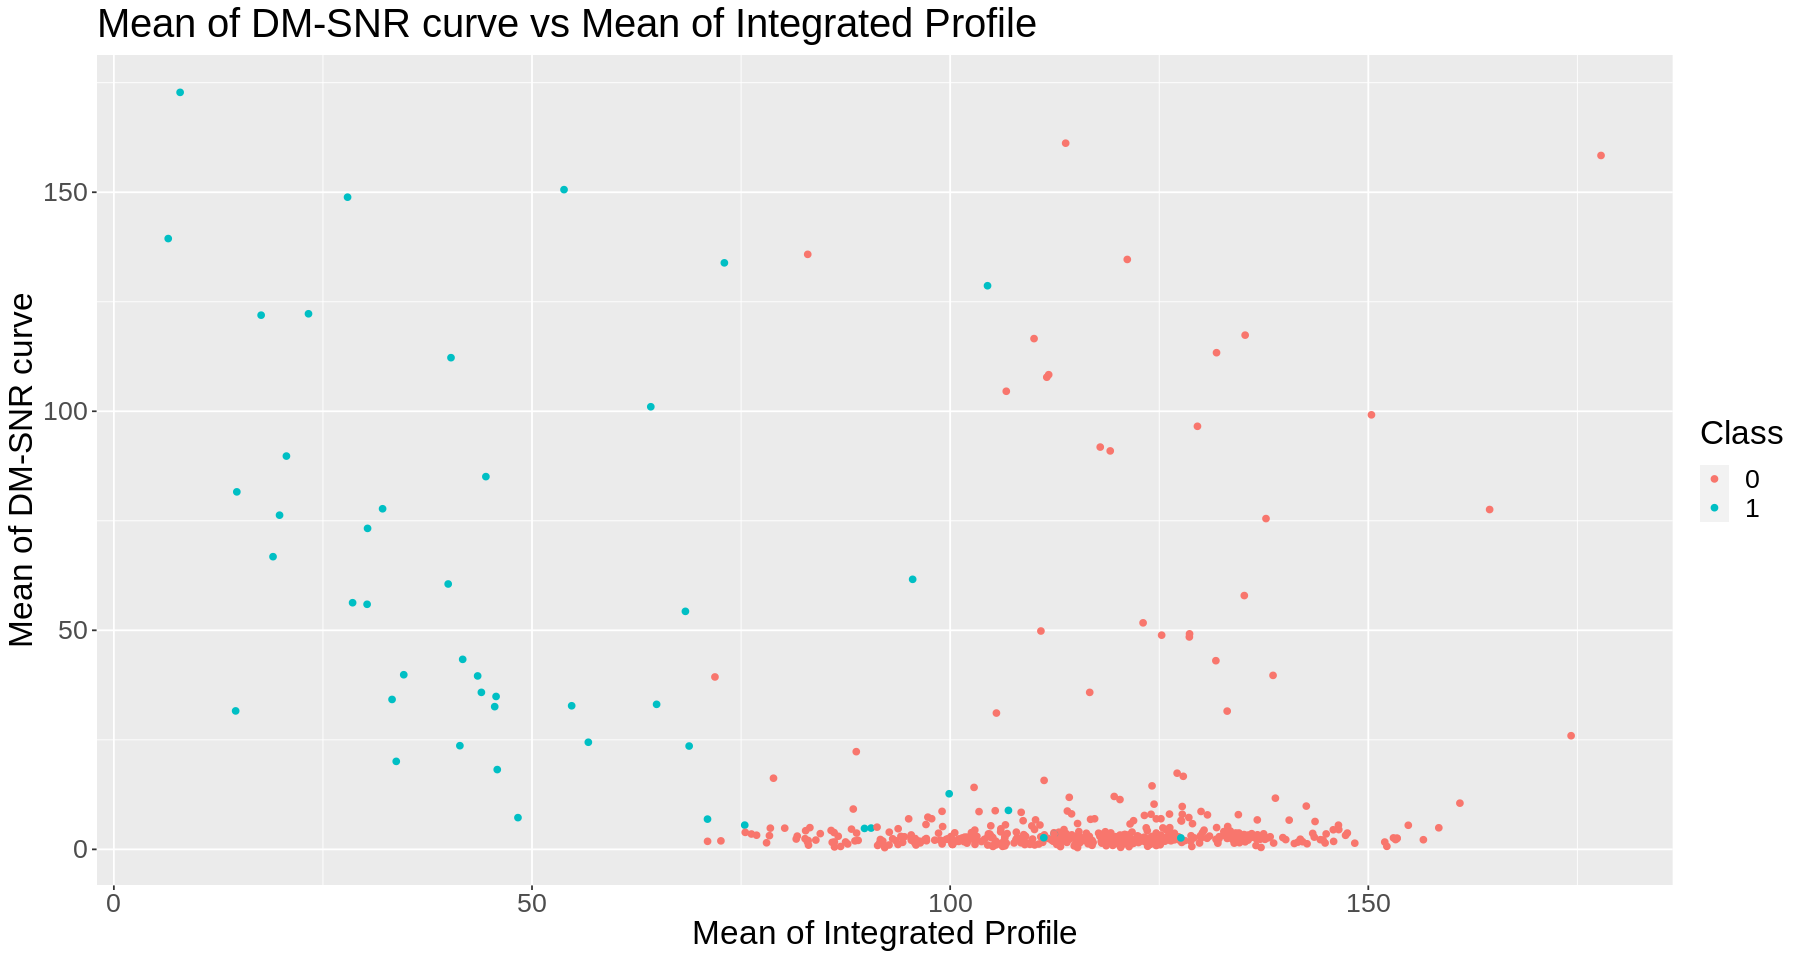

In [42]:
#Plotting scatterplots for Mean Intergrated Profile vs DM-SNR curve

options(repr.plot.width = 15, repr.plot.height = 8)

means_plot <- pulsar_data %>%
                ggplot(aes(x = mean_ip, y = mean_dm, color = class)) +
                geom_point() +
                labs(x = "Mean of Integrated Profile", y = "Mean of DM-SNR curve", color = "Class") +
                ggtitle("Mean of DM-SNR curve vs Mean of Integrated Profile") +
                theme(text = element_text(size = 20))
means_plot

**Planned Data Analysis**

In [43]:
set.seed(19)

#Splitting our data

pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = class)  
pulsar_training_data <- training(pulsar_split)   
pulsar_testing_data <- testing(pulsar_split)

#Cross validation
pulsar_vfold <- vfold_cv(pulsar_training_data, v = 5, strata = class)

#knn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

In [44]:
#Accuracy vs k plot for Mean and Standard deviation of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_1 <- recipe(class ~ mean_ip + std_dev_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors()) %>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:10)

knn_ip_results_1 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_1) %>%
       collect_metrics() %>%
       filter(.metric == "accuracy")

ip_plot_1 <- ggplot(knn_ip_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Std dev of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [45]:
#Accuracy vs k plot for Mean and Skewness of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_2 <- recipe(class ~ mean_ip + skewness_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:10)

knn_ip_results_2 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_2 <- ggplot(knn_ip_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Skewness of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [46]:
#Accuracy vs k plot for Mean and Excess kurtosis of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_3 <- recipe(class ~ mean_ip + excess_kurtosis_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:10)

knn_ip_results_3 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_3 <- ggplot(knn_ip_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Excess kurtosis of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [47]:
#Accuracy vs k plot for Mean and Standard deviation of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_1 <- recipe(class ~ mean_dm + std_dev_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:10)

knn_dm_results_1 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_1 <- ggplot(knn_dm_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Std dev of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

In [48]:
#Accuracy vs k plot for Mean and Skewness of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_2 <- recipe(class ~ mean_dm + skewness_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:10)

knn_dm_results_2 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_2 <- ggplot(knn_dm_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Skewness of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

In [49]:
#Accuracy vs k plot for Mean and Excess kurtosis of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_3 <- recipe(class ~ mean_dm + excess_kurtosis_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:10)

knn_dm_results_3 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_3 <- ggplot(knn_dm_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Excess kurtosis of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

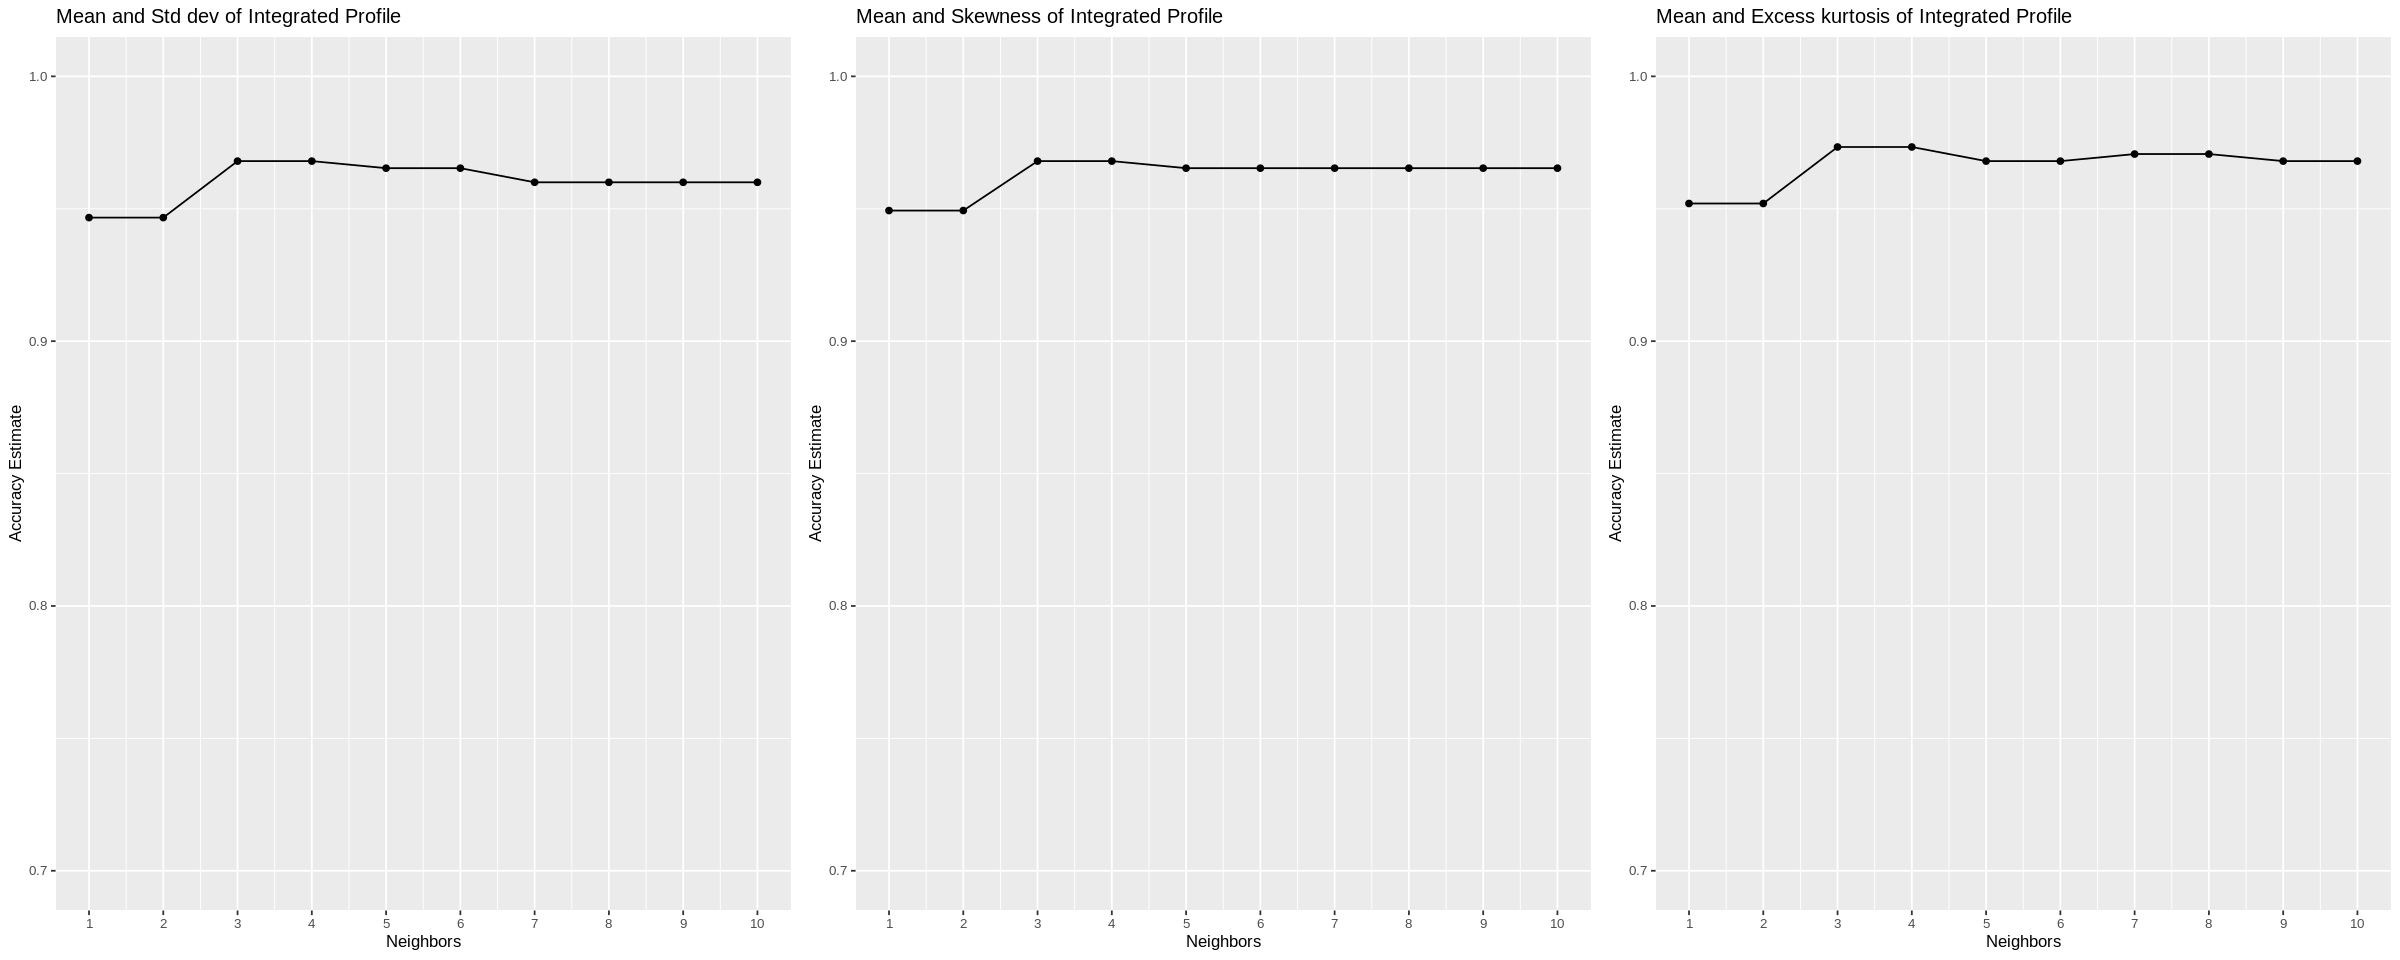

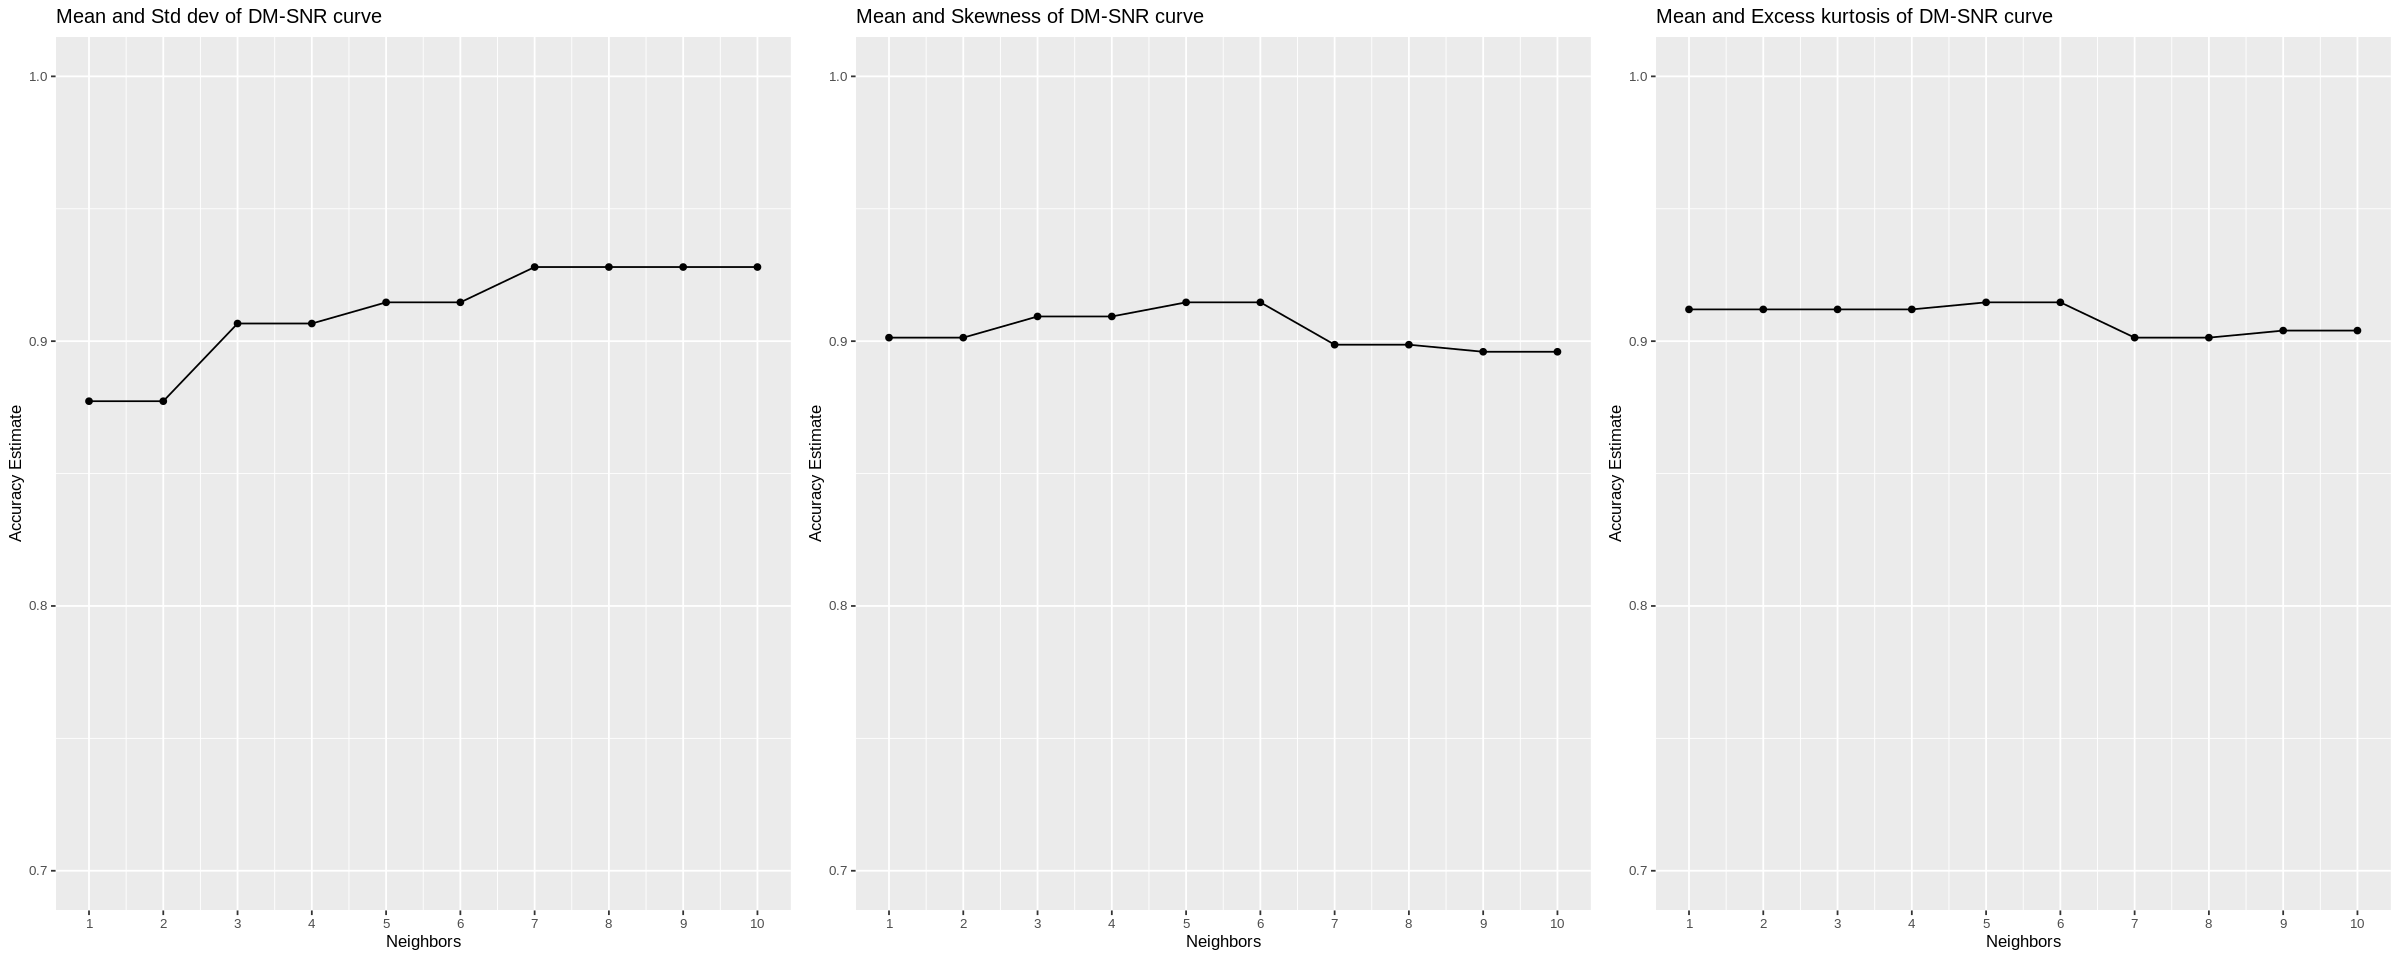

In [50]:
options(repr.plot.width = 20, repr.plot.height = 8)
plot_grid(ip_plot_1, ip_plot_2, ip_plot_3, ncol = 3)
plot_grid(dm_plot_1, dm_plot_2, dm_plot_3, ncol = 3)

In [52]:
#Choosing the best variable pair

set.seed(19)

max_ip_dev <- knn_ip_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Std dev")

max_ip_skewness <- knn_ip_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Skewness")

max_ip_kurtosis <- knn_ip_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Excess kurtosis")

max_dm_dev <- knn_dm_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Std dev")

max_dm_skewness <- knn_dm_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Skewness")

max_dm_kurtosis <- knn_dm_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables =  "Mean DM-SNR & excess kurtosis")

max_accuracies <- bind_rows(max_ip_dev,max_ip_skewness, max_ip_kurtosis, max_dm_dev, max_dm_skewness, max_dm_kurtosis) %>%
                  arrange(desc(mean))
max_accuracies

neighbors,mean,variables
<int>,<dbl>,<chr>
3,0.9733333,Mean IP & Excess kurtosis
3,0.9680000,Mean IP & Std dev
3,0.9680000,Mean IP & Skewness
7,0.9280000,Mean DM-SNR & Std dev
5,0.9146667,Mean DM-SNR & Skewness
5,0.9146667,Mean DM-SNR & excess kurtosis


In [53]:
#Building our model using Mean IP and Excess kurtosis predictors

set.seed(19)

pulsar_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 3) %>%
                set_engine("kknn") %>%
                set_mode("classification")

pulsar_model_fit <- workflow() %>%
            add_recipe(pulsar_ip_recipe_3) %>%
            add_model(pulsar_model_spec) %>%
            fit(data = pulsar_training_data)

pulsar_predictions <- predict(pulsar_model_fit, pulsar_testing_data) %>%
                        bind_cols(pulsar_testing_data)

pulsar_metrics <- pulsar_predictions %>%
                    metrics(truth = class, estimate = .pred_class)
pulsar_metrics

pulsar_conf_mat <- pulsar_predictions %>%
                    conf_mat(truth = class, estimate = .pred_class)
pulsar_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9920000
kap,binary,0.9584856


          Truth
Prediction   0   1
         0 111   1
         1   0  13

In [54]:
#Predicting the class of a new observation using our model

set.seed(19)

random_mean = runif(1, min = 5.8125000, max = 192.617188)
random_excess = runif(1, min = -1.8760112, max = 7.879628)
random_point = tibble(mean_ip = random_mean, excess_kurtosis_ip = random_excess)
random_point

class_prediction <- predict(pulsar_model_fit, random_point)
class_prediction

mean_ip,excess_kurtosis_ip
<dbl>,<dbl>
27.69304,2.846008


.pred_class
<fct>
1


In [55]:
#Scaling data and finding the nearest neighbors

set.seed(19)

predicted_new_observation <- tibble(mean_ip = 27.69304,
                         excess_kurtosis_ip = 2.846008,
                         class = "1")

scaled_pulsar_data_with_new_obs <- pulsar_data %>%
                        select(mean_ip, excess_kurtosis_ip, class) %>%
                        bind_rows(predicted_new_observation) %>%
                        mutate(scaled_mean_ip = scale(mean_ip, center = TRUE),
                               scaled_excess_kurtosis_ip = scale(excess_kurtosis_ip, center = TRUE))

scaled_pulsar_only_data <- scaled_pulsar_data_with_new_obs %>%
        filter(class == "1") %>%
        select(class, scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
        filter(scaled_mean_ip > -3.5, scaled_mean_ip < -2, scaled_excess_kurtosis_ip > 1, scaled_excess_kurtosis_ip < 3) %>%
        arrange(scaled_excess_kurtosis_ip)
scaled_pulsar_only_data

class,scaled_mean_ip,scaled_excess_kurtosis_ip
<chr>,"<dbl[,1]>","<dbl[,1]>"
1,-2.582730,1.311606
1,-2.871684,1.463493
1,-3.035240,2.035978
1,-2.072456,2.174509
1,-2.275357,2.442077
1,-2.038783,2.472234
1,-2.416668,2.644476
1,-2.366590,2.752227
1,-2.531214,2.871730


In [56]:
set.seed(19)

distance_1 <- scaled_pulsar_only_data %>%
    slice(1, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_1

distance_2 <- scaled_pulsar_only_data %>%
    slice(2, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_2

distance_4 <- scaled_pulsar_only_data %>%
    slice(4, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_4

distance_5 <- scaled_pulsar_only_data %>%
    slice(5, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_5

distance_6 <- scaled_pulsar_only_data %>%
    slice(6, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_6

distance_7 <- scaled_pulsar_only_data %>%
    slice(7, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_7

distance_8 <- scaled_pulsar_only_data %>%
    slice(8, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_8

distance_9 <- scaled_pulsar_only_data %>%
    slice(9, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_9

distance_10 <- scaled_pulsar_only_data %>%
    slice(10, 3) %>%
    select(scaled_mean_ip, scaled_excess_kurtosis_ip) %>%
    dist()
distance_10

          1
2 0.8540963

          1
2 0.5953907

          1
2 0.9726996

          1
2 0.8615906

         1
2 1.087771

          1
2 0.8676983

          1
2 0.9798495

         1
2 0.975973

         1
2 1.014101

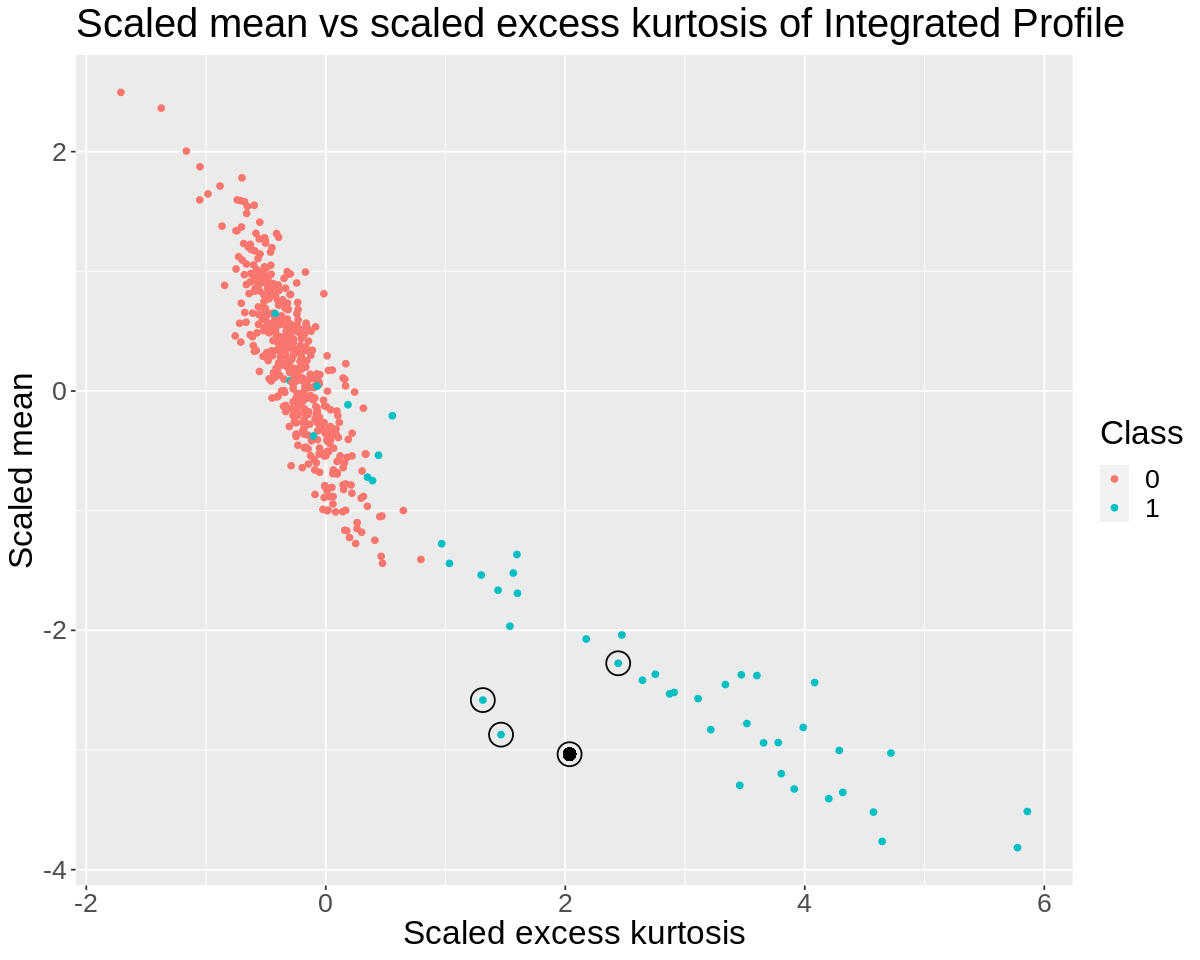

In [57]:
#Visualization of classification with scaled data

set.seed(19)

options(repr.plot.width = 10, repr.plot.height = 8)

point1 <- c(2.03597849, -3.03524016)
point2 <- c(1.46349305, -2.87168441)
point3 <- c(1.31160611, -2.58273031)
point4 <- c(2.442077, -2.275357)

scaled_mean_vs_kurtosis_plot <- scaled_pulsar_data_with_new_obs %>%
                            ggplot(aes(x = scaled_excess_kurtosis_ip, y = scaled_mean_ip, color = class)) +
                            geom_point() +
                            geom_point(aes(x = 2.03597849, y = -3.03524016), color = "black", size = 3) +
                            labs(x = "Scaled excess kurtosis", y = "Scaled mean", color = "Class") +
                            ggtitle("Scaled mean vs scaled excess kurtosis of Integrated Profile") +
                            theme(text = element_text(size = 20)) +

                            annotate("path", 
                             x=point1[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                    
                            annotate("path", 
                             x=point2[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point2[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                            
                            annotate("path", 
                             x=point3[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point3[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                             
                            annotate("path", 
                             x=point4[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point4[2] + 0.1*sin(seq(0,2*pi,length.out=100)))
                            
scaled_mean_vs_kurtosis_plot